## Selenium Web Scraping

### Web scraping E-commerce sites to compare prices with Python

Shopee and Lazada are two e-commerce platforms that customers are likely to consider when making an online purchase. As the two largest e-commerce sites that are operating in Malaysia, they are both excellent places to start looking for a deal. It is a common belief that, of the two e-commerce platforms in Malaysia, one is typically more affordable and caters to people who are looking for deals, while the other platform serves customers who are less concerned about prices.

This study will determine whether one of the e-commerce websites is in fact less expensive than the other. Using a Python script with Selenium and the Chrome web driver, we will automate the scraping process and generate our dataset. Here, we will be scraping the product's name and price. Then, we will perform some basic data analysis with Pandas on the scraped dataset. We will conclude the price comparison using Matplotlib and Seaborn to create a simple visual chart.

#### By: Group 9
#### Team Members: 

<table>
  <tr>
    <th>Name</th>
    <th>Matric No</th>
  </tr>
  <tr>
    <th>Eddie Wong Chung Pheng </th>
    <th>A20EC0031</th>
  </tr>
  <tr>
    <th>Madihah Binti Che Zabri </th>
    <th>A20EC0074</th>
  </tr>
  <tr>
    <th>Nurarissa Dayana Binti Mohd Sukri</th>
    <th>A20EC0120</th>
  </tr>
  <tr> 
    <th>Vincent Boo Ee Khai</th>
    <th>A20EC0231</th>
  </tr>
</table>
<br></br>

### 1. Install Webdriver Manager
WebDriverManager is an open-source Java library that automates the management (i.e., download, installation, and maintenance) of the Selenium WebDriver drivers (e.g., chromedriver, geckodriver, msedgedriver, etc.).

In [1]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


### 2. Web Scrapping with Selenium
Import all the necessary libraries. Pandas and the Selenium webdriver are the main libraries for simple web scraping.

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import *

#Data manipulation
import pandas as pd
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

After importing the libraries, the next step is to initiate the Chrome driver. The Chrome browser should open in a new empty window since there is no feed URL.

In [3]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

### Scraping Lazada

The target feed URL is saved as `Lazada_url`. It will open Lazada e-commerce platform and search for the item specified.

In [4]:
Lazada_url = 'https://www.lazada.com.my'
search_item = 'Nestle Honey Stars 150g'
driver.get(Lazada_url)

In [5]:
p = driver.find_element(By.ID, 'q')
p.send_keys(search_item)
p.submit()

Once the feed URL is entered, the target website will be opened. The following process is to find the name and price of our search item. In Selenium, you can find the HTML elements by the using Class name methods.

In [6]:
item_titles = driver.find_elements(By.CLASS_NAME, 'RfADt')
item_prices = driver.find_elements(By.CLASS_NAME, 'ooOxS')

In [7]:
# Initialize empty lists
titles_list = []
prices_list = []

# Loop over the item_titles and item_prices
for title in item_titles:
    titles_list.append(title.text)
for price in item_prices:
    prices_list.append(price.text)

After scraping this page, we will proceed to the next page. XPath is used because the next page button has two classes and the find element by class name method only finds elements from one class. We must also tell the browser what to do if the next page button is disabled. If the button is disabled, the browser closes. If not disabled, it will move to the next page, requiring another scrape. Our search yielded 25 results on one page, thus concluding our scraping procedure.

In [8]:
try:
    driver.find_element('xpath','//*[@id="root"]/div/div[2]/div[1]/div/div[1]/div[3]/div/ul/li[3]/button/span/svg').click()
except NoSuchElementException: 
    driver.quit()

Lastly, save the data in the data frame.

In [10]:
dfL = pd.DataFrame(zip(titles_list, prices_list), columns=['ItemName', 'Price'])
dfL.head()

,ItemName,Price
0,NESTLE HONEY STARS Cereal 150g,RM7.19
1,Nestle Honey Stars Cereal With Whole Grain 150g,RM7.34
2,HONEY STAR CEREAL 150G #Okborong #Borong #Brea...,RM7.50
3,HONEY STAR CEREAL 150G x 6 BOX #Okborong #Boro...,RM10.90
4,Nestle Honey Stars Cereal 150G,RM49.80


### Scraping Shopee

In [29]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
Shopee_url = 'https://shopee.com.my/'
driver.get(Shopee_url)

In [30]:
WebDriverWait(driver, 20).until(EC.element_to_be_clickable(
    (By.XPATH,'//*[@id="modal"]/div[1]/div[1]/div/div[3]/div[1]/button'))).click()

In [31]:
try:
    time.sleep(3)
    close_btn = driver.execute_script('return document.querySelector("#shopee-banner-popup-stateful").shadowRoot.querySelector("div.home-popup__close-area div.shopee-popup__close-btn")')
    close_btn.click()
except:
    pass

In [32]:
p = driver.find_element(By.CLASS_NAME, 'shopee-searchbar-input__input')
p.send_keys(search_item)
driver.find_element('xpath', '//*[@id="main"]/div/header/div[2]/div/div[1]/div[1]/button').click()

In [35]:
item_titles2 = driver.find_elements(By.CLASS_NAME, 'dpiR4u')
item_prices2 = driver.find_elements(By.CLASS_NAME, 'ZEgDH9')

#Initialize empty lists
titles_list2 = []
prices_list2 = []

#Loop over the item_titles and item_prices
for title in item_titles2:
    titles_list2.append(title.text)
for price in item_prices2:
    prices_list2.append(price.text)

In [34]:
scroll_pause_time = 1

while True:
    last_height = driver.execute_script("return document.body.scrollHeight")
    driver.execute_script("window.scrollTo(0, window.scrollY + 500);")
    time.sleep(scroll_pause_time)
    new_height = driver.execute_script("return document.body.scrollHeight")
 
    if new_height == last_height:
        driver.execute_script("window.scrollTo(0, window.scrollY + 500);")
        time.sleep(scroll_pause_time)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        else:
            last_height = new_height
            continue

In [36]:
#close driver
try:
    driver.find_element('xpath','//*[@id="main"]/div/div[2]/div/div/div[2]/div[2]/div[3]/div/button[3]/svg').click()
except NoSuchElementException: 
    driver.quit()

In [39]:
dfS = pd.DataFrame(zip(titles_list2, prices_list2), columns=['ItemName', 'Price'])
dfS.head()

,ItemName,Price
0,Nestle Honey Stars Cereal (150g)\n50% off\nLoc...,6.80
1,Nestle Honey Stars Cereal (300g/150g)\nLocal S...,6.40
2,Nestle Honey Stars Cereal 450g\n2 Feb Only | R...,8.90
3,Nestle Honey Stars Cereal Econopack (450g x 2 ...,16.55
4,Nestle Honey Stars Cereal (300g)\n50% off\nLoc...,29.35


### 3. Data Cleaning and Preparation

`dfL.info()` shows that the Price column type is object, not float as each Price column entry contains the currency symbol "RM" (Malaysian Ringgit). If the Price column is not integer or float, we cannot extract statistical features from it. We will also change the ItemName column to string.

In [38]:
dfL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 27
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ItemName  21 non-null     object 
 1   Price     21 non-null     float64
 2   Platform  21 non-null     object 
dtypes: float64(1), object(2)
memory usage: 672.0+ bytes


We need to remove the currency symbol and convert the entire column into a float type

In [19]:
dfL['Price'] = dfL['Price'].str.replace('RM', '').astype(float)

In [49]:
dfS['Price'] = dfS['Price'].astype(float)

Then we will remove any irrelevant entries

In [20]:
dfL = dfL[dfL['ItemName'].str.contains('Starbucks') == False]
dfL = dfL[dfL['ItemName'].str.contains('Cornflake') == False]
dfL = dfL[dfL['ItemName'].str.contains('CORNFLAKE') == False]

In [40]:
i=0
for x in dfS['ItemName']:
    dfS['ItemName'][i] = dfS['ItemName'].str.rsplit('\n')[i][:-2]   
    if dfS['ItemName'][i] == []:
        dfS['ItemName'][i] = 'Nestle Honey Stars 150g'
    
    i+=1

Additionally, we will create a column titled `Platform` and assign "Lazada" and "Shopee" respectively to each entry in this column. This is done so that we can group the entries by platform (Lazada and Shopee) when we compare prices between the two platforms later.

In [21]:
dfL['Platform'] = 'Lazada'

In [43]:
dfS['Platform'] = 'Shopee'

We export the data to a csv file.

In [44]:
dfL.to_csv('Honey Stars Lazada.csv')

In [45]:
dfS.to_csv('Honey Stars Shopee.csv')

### 4. Visualization and Analysis

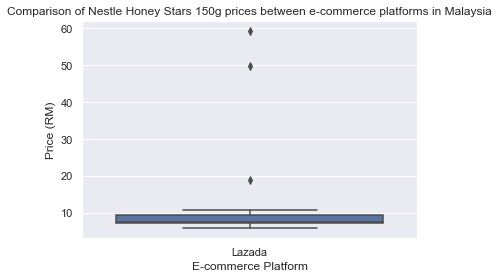

In [46]:
# Plot the chart
sns.set()
_ = sns.boxplot(x='Platform', y='Price', data=dfL)
_ = plt.title('Comparison of Nestle Honey Stars 150g prices between e-commerce platforms in Malaysia')
_ = plt.ylabel('Price (RM)')
_ = plt.xlabel('E-commerce Platform')
# Show the plot
plt.show()

For Lazada, the prices of the items range from RM6 to RM20, with the median price falling between RM7 and RM8. The box also has slightly longer whiskers, indicating that the prices are relatively inconsistent with significant outliers. 


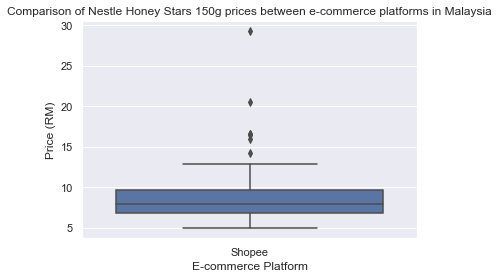

In [51]:
# Plot the chart
sns.set()
_ = sns.boxplot(x='Platform', y='Price', data=dfS)
_ = plt.title('Comparison of Nestle Honey Stars 150g prices between e-commerce platforms in Malaysia')
_ = plt.ylabel('Price (RM)')
_ = plt.xlabel('E-commerce Platform')
# Show the plot
plt.show()

### References
* https://medium.com/@zfwong.wilson/web-scraping-e-commerce-sites-to-compare-prices-with-python-part-1-360509ee5c62